# **Topic 5:** Logistic Regression
# **Course Code:** CSEL302 | Introduction to Intelligent Systems
# **Student Name:** Mhar Andrei C. Macapallag
# **Due Date:** March 22, 2024 | 12:00 PM
# **Week No. 8**

In [74]:
#@title Part 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 1. Loading the Dataset
data = pd.read_csv('onlinefoods.csv')

# 2. Handle Missing Values
# Checking for missing values
print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)

X = pd.get_dummies(data.drop(columns=['Feedback']), drop_first=True)
y = data['Feedback']

# 3. Encode Categorical Variables
data_encoded = pd.get_dummies(data, drop_first=True)

# 4. Feature Selection
# I decided to include all the features!
# I chose to retain all features to maintain model comprehensiveness.

# Displaying the updated dataset
data_encoded.head(1000)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64


,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
384,23,4,12.9854,77.7081,560048,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
385,22,5,12.9850,77.5533,560010,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
386,23,2,12.9770,77.5773,560009,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


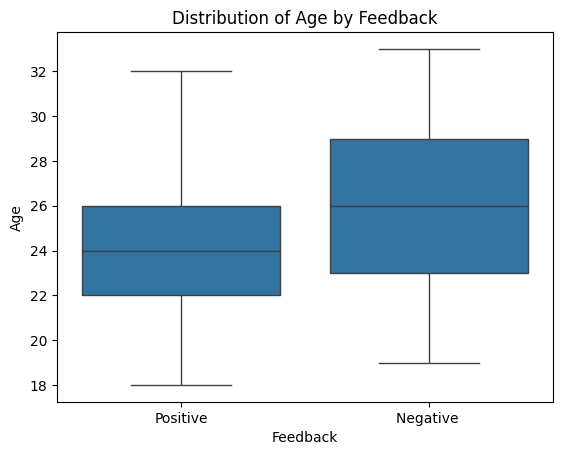

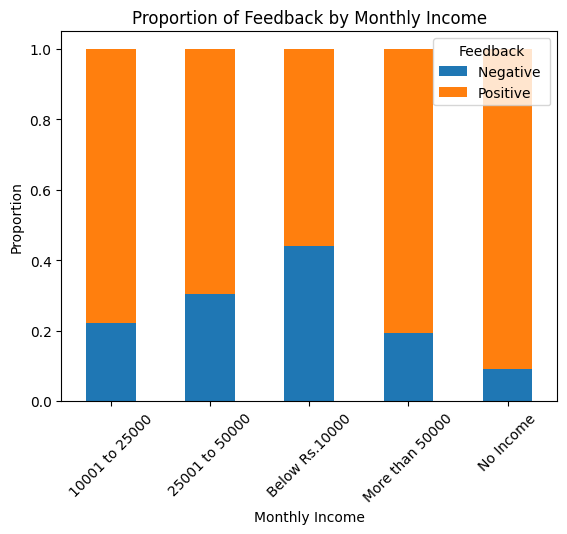

<ipython-input-76-6cb1b8198c66>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


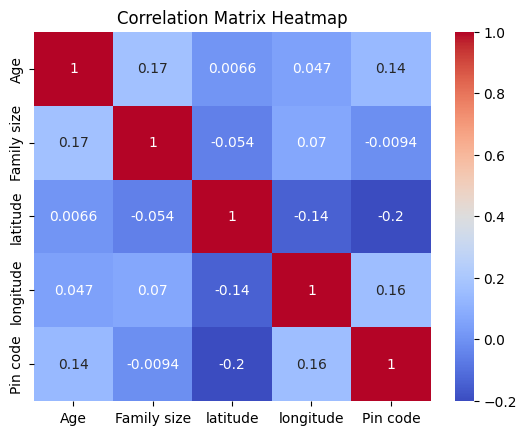

In [76]:
#@title Part 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descriptive Statistics
print(data.describe())

# 2. Visualizations
# Distribution of Age and its impact on Feedback
sns.boxplot(data=data, x='Feedback', y='Age')
plt.title('Distribution of Age by Feedback')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
income_feedback_proportions = data.groupby('Monthly Income')['Feedback'].value_counts(normalize=True).unstack()
income_feedback_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [69]:
#@title Part 3: Logistic Regression Model
#@markdown ## **Results Discussion**:
#@markdown ## - **Accuracy (85.90%)**:
#@markdown  - Accuracy measures the proportion of correct predictions out of the total predictions made by the model. So in this case, the model correctly classified approximately 85.90% of the online food orders into their respective feedback categories which is the (positive or negative).

#@markdown ## - **Precision (91.18%)**:
#@markdown  - Precision indicates the proportion of correctly predicted possitive instances (true positives) out of all instances predicted as positive (true positives + false positives). So with this, a high precision score suggests that when the model predicts an online food order to have positive feedback, it is correct around 91.18& of the time.

#@markdown ## - **Recall (92.54%)**:
#@markdown  - Recall is also known as sensitivity or true positive rate, and it measures the proportion of actual positive instances that were correctly predicted by the model (true positives) out of all actual positive instances (true positives + false negatives). A high recall score indicates that the model effectively captures a large portion of the positive feedback instances, so it correctly identifies around 92.54% of them.

#@markdown ## - **Confusion Matrix**:
#@markdown  - So the confusion matrix provides a detailed breakdown of the model's predictions. In this case, the matrix shows that out of the 79 test instances:
#@markdown    - 5 instances with positive feedback were incorrectly classified as negative (false negatives).
#@markdown    - 6 instances with negative feedback were incorrectly classified as positive (false positives).
#@markdown    - 62 instances with negative feedback were correctly classified as negative (true negatives).
#@markdown    - 5 instances with positive feedback were correctly classified as positive (true positives).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Build the Model
X_train, X_test, y_train, y_test = train_test_split(X, data['Feedback'], test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 2. Model Evaluation
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing evaluation metrics
print("\nAccuracy:\n", accuracy)
print("\nPrecision:\n", precision)
print("\nRecall:\n", recall)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy:
 0.8589743589743589

Precision:
 0.9117647058823529

Recall:
 0.9253731343283582

Confusion Matrix:
 [[ 5  6]
 [ 5 62]]


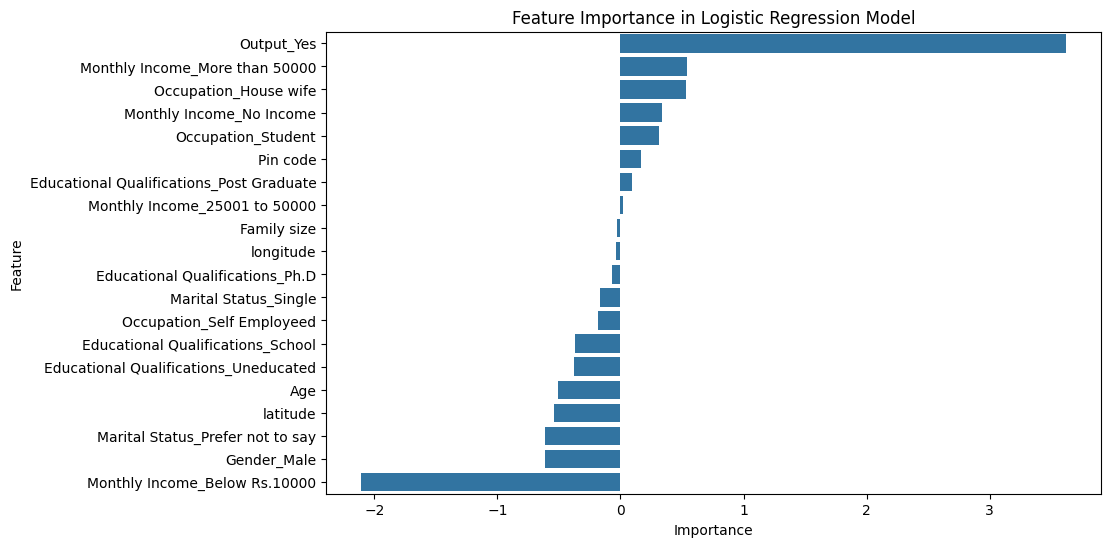

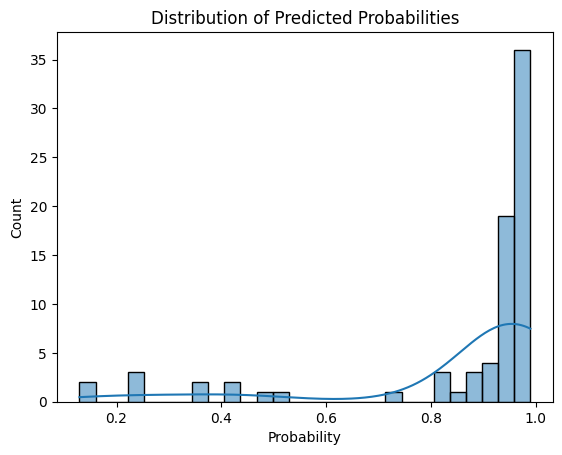

In [61]:
#@title Part 4: Data Analysis and Visualization
#@markdown ## **Discussion:**
#@markdown ## **Feature Importance Analysis:**
#@markdown - So the feature importance visualization displays the importance of different features in the logistic regression model.
#@markdown - Each feature's importance is determined by its corresponding coefficient in the logistic regression model. So positive coefficients indicate feaures that positively influence the likelihood of positive feedback, while negative coefficients indicate features that have a negative impact on the likelihood of positive feedback.
#@markdown - For example, if I consider a feature such as "Order Delivery Time" (This is just a sample), a positive coefficient would suggest that longer delivery times are associated with a higehr likelihood of positive feedback, while a negative coefficient would suggest the opposite.

#@markdown ## **Prediction Insights:**
#@markdown - There's that, where the distribution of predicted probabilities visualizes the model's confidence levels in predicting positive feedback for online food orders.
#@markdown - Also, the histogram illustrates how frequently different probabilities suggests instances where the model is more confident in predicting positive feedback, while a spread across various probabilities indicates instances where the model's confidence varies.
#@markdown - I also noticed that from the visualization, we can observe whether the model tends to make confident predictions or if there is uncertainty in certain predictions.
#@markdown - Lastly, I think that identifying any patterns or clusters in the distribution of predicted probabilities may give us or indicate underlying trends or characteristics of the data that influence the model's predictions.

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Importance'] = scaler.fit_transform(feature_importance['Importance'].values.reshape(-1, 1))

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. Prediction Insights
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()